# Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

## Load Dataset

In [10]:
# data_one contains the list of dic from the trainset
with open('trainset/training_set_task2.txt', 'r') as file:
    data_one = json.load(file)

# data_two contains the list of dic from the devset
with open('trainset/dev_set_task2.txt', 'r') as file:
    data_two = json.load(file)

# data_three contains the list of dic from the devset
with open('testset/test_set_task2.txt', 'r') as file:
    data_three = json.load(file)

# Both datasets are flattened/normalised to make comparison 
df_train = pd.json_normalize(data_one, record_path=['labels'], meta=['id', 'text'])
df_dev = pd.json_normalize(data_two, record_path=['labels'], meta=['id', 'text'])
df_test = pd.json_normalize(data_three, record_path=['labels'], meta=['id', 'text'])

### Preview of the Dataset

In [11]:
data_one[:5]

[{'id': '128',
  'text': 'THERE ARE ONLY TWO GENDERS\n\nFEMALE \n\nMALE\n',
  'labels': [{'start': 0,
    'end': 41,
    'technique': 'Black-and-white Fallacy/Dictatorship',
    'text_fragment': 'THERE ARE ONLY TWO GENDERS\n\nFEMALE \n\nMALE'}]},
 {'id': '189', 'text': 'This is not an accident!', 'labels': []},
 {'id': '96',
  'text': "SO BERNIE BROS HAVEN'T COMMITTED VIOLENCE EH?\n\nPOWER COMES FROM THE BARREL OF A GUN, COMRADES.\n\nWHAT ABOUT THE ONE WHO SHOT CONGRESSMAN SCALISE OR THE DAYTON OHIO MASS SHOOTER?\n",
  'labels': [{'end': 83,
    'start': 47,
    'technique': 'Slogans',
    'text_fragment': 'POWER COMES FROM THE BARREL OF A GUN'},
   {'end': 14,
    'start': 3,
    'technique': 'Name calling/Labeling',
    'text_fragment': 'BERNIE BROS'},
   {'end': 41,
    'start': 33,
    'technique': 'Loaded Language',
    'text_fragment': 'VIOLENCE'},
   {'end': 175,
    'start': 163,
    'technique': 'Loaded Language',
    'text_fragment': 'MASS SHOOTER'},
   {'end': 93,
    'start

In [12]:
data_two[:5]

[{'id': '62_batch_2',
  'text': '*President* Biden?\n\nPlease, no.\n',
  'labels': []},
 {'id': '111_batch_2',
  'text': 'JOE  VERSUS THE VOLCANIC KREMLIN DON\n\n"WILL YOU SHUT UP, MAN?"\n\nLORD OF THE LIES',
  'labels': [{'start': 48,
    'end': 55,
    'technique': 'Loaded Language',
    'text_fragment': 'SHUT UP'},
   {'start': 64,
    'end': 80,
    'technique': 'Name calling/Labeling',
    'text_fragment': 'LORD OF THE LIES'},
   {'start': 64,
    'end': 80,
    'technique': 'Loaded Language',
    'text_fragment': 'LORD OF THE LIES'},
   {'start': 16,
    'end': 36,
    'technique': 'Name calling/Labeling',
    'text_fragment': 'VOLCANIC KREMLIN DON'}]},
 {'id': '167_batch_2',
  'text': 'ANTI-VAXXERS BE LIKE... \n\nHANG ON A SEC - JUST COLLECTING MY FACTS',
  'labels': []},
 {'id': '93_batch_2', 'text': 'VIRUS BINGO\nFREE 32 SPACE\n', 'labels': []},
 {'id': '153_batch_2',
  'text': "Never thought l'd die fighting IRRESPONSIBLY RUSHED VACCINES side by side with an ANTIVAXXER\n\nWha

In [13]:
data_three[:5]

[{'id': '705_batch_2',
  'text': 'The Democrats New America\n',
  'labels': [{'start': 0,
    'end': 25,
    'technique': 'Name calling/Labeling',
    'text_fragment': 'The Democrats New America'},
   {'start': 0,
    'end': 25,
    'technique': 'Slogans',
    'text_fragment': 'The Democrats New America'}]},
 {'id': '706_batch_2',
  'text': 'WE ARE AT WAR!\n\nThere is a complex assault on our presidential election\nwith all the multifaceted tentacles of a terrorist organization and operation\n\n2020\nTERRORISM\n',
  'labels': [{'start': 0,
    'end': 149,
    'technique': 'Appeal to fear/prejudice',
    'text_fragment': 'WE ARE AT WAR!\n\nThere is a complex assault on our presidential election\nwith all the multifaceted tentacles of a terrorist organization and operation'},
   {'start': 10,
    'end': 13,
    'technique': 'Loaded Language',
    'text_fragment': 'WAR'},
   {'start': 85,
    'end': 107,
    'technique': 'Name calling/Labeling',
    'text_fragment': 'multifaceted tentacle

In [14]:
df_train.head(5)

,start,end,technique,text_fragment,id,text
0,0,41,Black-and-white Fallacy/Dictatorship,THERE ARE ONLY TWO GENDERS\n\nFEMALE \n\nMALE,128,THERE ARE ONLY TWO GENDERS\n\nFEMALE \n\nMALE\n
1,47,83,Slogans,POWER COMES FROM THE BARREL OF A GUN,96,SO BERNIE BROS HAVEN'T COMMITTED VIOLENCE EH?\...
2,3,14,Name calling/Labeling,BERNIE BROS,96,SO BERNIE BROS HAVEN'T COMMITTED VIOLENCE EH?\...
3,33,41,Loaded Language,VIOLENCE,96,SO BERNIE BROS HAVEN'T COMMITTED VIOLENCE EH?\...
4,163,175,Loaded Language,MASS SHOOTER,96,SO BERNIE BROS HAVEN'T COMMITTED VIOLENCE EH?\...


In [15]:
df_dev.head(5)

,start,end,technique,text_fragment,id,text
0,48,55,Loaded Language,SHUT UP,111_batch_2,"JOE VERSUS THE VOLCANIC KREMLIN DON\n\n""WILL ..."
1,64,80,Name calling/Labeling,LORD OF THE LIES,111_batch_2,"JOE VERSUS THE VOLCANIC KREMLIN DON\n\n""WILL ..."
2,64,80,Loaded Language,LORD OF THE LIES,111_batch_2,"JOE VERSUS THE VOLCANIC KREMLIN DON\n\n""WILL ..."
3,16,36,Name calling/Labeling,VOLCANIC KREMLIN DON,111_batch_2,"JOE VERSUS THE VOLCANIC KREMLIN DON\n\n""WILL ..."
4,18,30,Exaggeration/Minimisation,die fighting,153_batch_2,Never thought l'd die fighting IRRESPONSIBLY R...


In [16]:
df_test.head(5)

,start,end,technique,text_fragment,id,text
0,0,25,Name calling/Labeling,The Democrats New America,705_batch_2,The Democrats New America\n
1,0,25,Slogans,The Democrats New America,705_batch_2,The Democrats New America\n
2,0,149,Appeal to fear/prejudice,WE ARE AT WAR!\n\nThere is a complex assault o...,706_batch_2,WE ARE AT WAR!\n\nThere is a complex assault o...
3,10,13,Loaded Language,WAR,706_batch_2,WE ARE AT WAR!\n\nThere is a complex assault o...
4,85,107,Name calling/Labeling,multifaceted tentacles,706_batch_2,WE ARE AT WAR!\n\nThere is a complex assault o...


### Span Balance
In this section we preview the number of text which contains spans or not.

#### Trainset

In [17]:
print("Total number of text in the trainset:", len(data_one))

Total number of text in the trainset: 688


In [18]:
# Caculates the number of empty spans per text
empty_spans = sum(1 for entry in data_one if not entry['labels'])
print("Text with Empty Spans:",empty_spans)

Text with Empty Spans: 143


In [19]:
# Caculates the number of non-empty spans per text
non_empty_spans = len(data_one) - empty_spans
print("Text with Non-Empty Spans:",non_empty_spans)

Text with Non-Empty Spans: 545


#### Devset

In [20]:
print("Total number of text in the devset:", len(data_two))

Total number of text in the devset: 63


In [21]:
# Caculates the number of empty spans per text
empty_spans = sum(1 for entry in data_two if not entry['labels'])
print("Text with Empty Spans:",empty_spans)

Text with Empty Spans: 15


In [22]:
# Caculates the number of non-empty spans per text
non_empty_spans = len(data_two) - empty_spans
print("Text with Non-Empty Spans:",non_empty_spans)

Text with Non-Empty Spans: 48


#### Testset

In [23]:
print("Total number of text in the testset:", len(data_three))

Total number of text in the testset: 200


In [24]:
# Caculates the number of empty spans per text
empty_spans = sum(1 for entry in data_three if not entry['labels'])
print("Text with Empty Spans:",empty_spans)

Text with Empty Spans: 41


In [25]:
# Caculates the number of non-empty spans per text
non_empty_spans = len(data_three) - empty_spans
print("Text with Non-Empty Spans:",non_empty_spans)

Text with Non-Empty Spans: 159


### Class Distribution

In this section, we preview the class distribution for each technique. 

#### Trainset

In [26]:
print("total spans in the trainset:", len(df_train))

total spans in the trainset: 1498


In [30]:
class_distribution_trainset = df_train['technique'].value_counts()
# Raw Output
print(class_distribution_trainset)

technique
Loaded Language                                        543
Name calling/Labeling                                  301
Smears                                                 202
Exaggeration/Minimisation                               59
Slogans                                                 49
Doubt                                                   49
Appeal to fear/prejudice                                46
Whataboutism                                            40
Glittering generalities (Virtue)                        33
Flag-waving                                             33
Causal Oversimplification                               29
Repetition                                              26
Thought-terminating cliché                              21
Misrepresentation of Someone's Position (Straw Man)     20
Black-and-white Fallacy/Dictatorship                    18
Appeal to authority                                     13
Reductio ad hitlerum                          

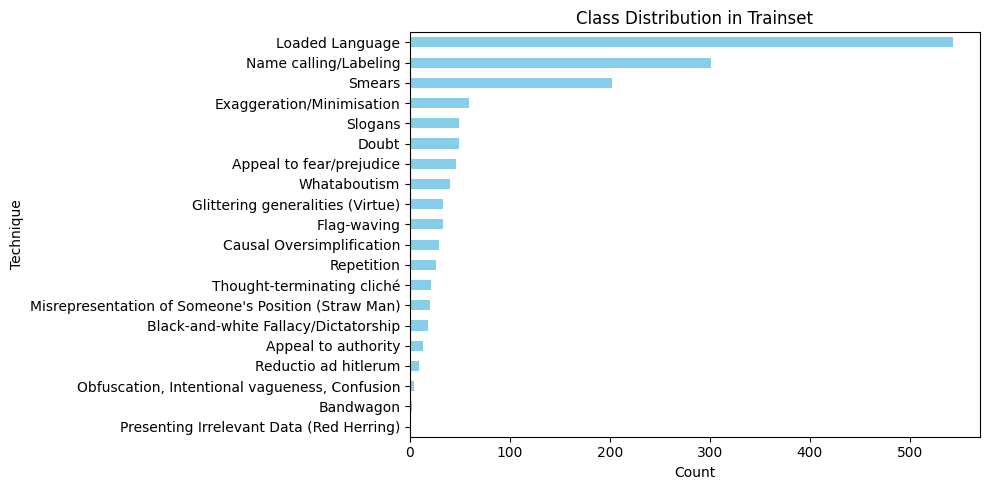

In [31]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 5))
class_distribution_trainset.plot(kind='barh', color='skyblue', ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('Technique')
ax.set_title('Class Distribution in Trainset')
ax.invert_yaxis()
plt.tight_layout()

plt.show()

#### Devset

In [32]:
print("total spans in the devset:", len(df_dev))

total spans in the devset: 182


In [33]:
class_distribution_dev = df_dev['technique'].value_counts()
# Raw Output
print(class_distribution_dev)

technique
Loaded Language                                        68
Name calling/Labeling                                  37
Smears                                                 19
Repetition                                             15
Doubt                                                   9
Exaggeration/Minimisation                               7
Flag-waving                                             5
Appeal to fear/prejudice                                4
Whataboutism                                            4
Misrepresentation of Someone's Position (Straw Man)     3
Slogans                                                 3
Bandwagon                                               2
Appeal to authority                                     2
Causal Oversimplification                               1
Thought-terminating cliché                              1
Glittering generalities (Virtue)                        1
Reductio ad hitlerum                                    1
Name

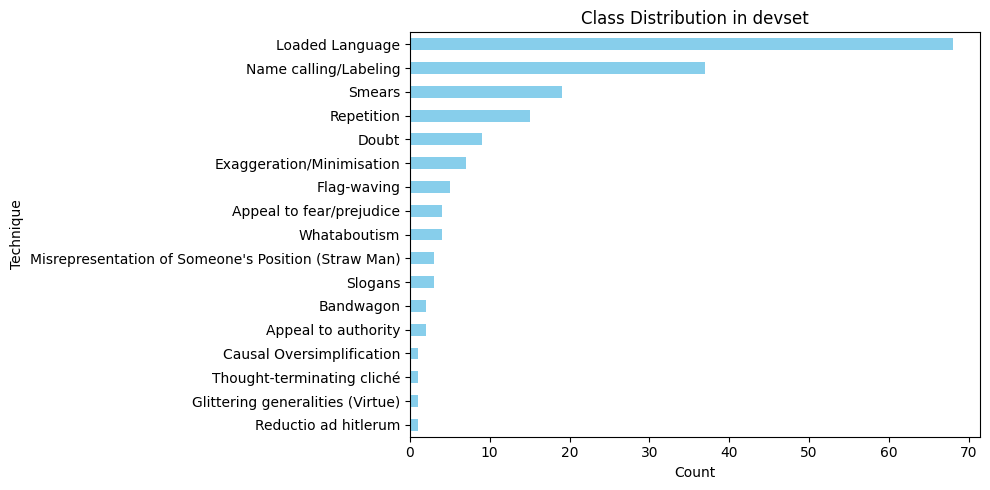

In [34]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 5))
class_distribution_dev.plot(kind='barh', color='skyblue', ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('Technique')
ax.set_title('Class Distribution in devset')
ax.invert_yaxis()
plt.tight_layout()

plt.show()

#### Testset

In [35]:
print("total spans in the trainset:", len(df_test))

total spans in the trainset: 403


In [36]:
class_distribution_test = df_test['technique'].value_counts()
# Raw Output
print(class_distribution_dev)

technique
Loaded Language                                        68
Name calling/Labeling                                  37
Smears                                                 19
Repetition                                             15
Doubt                                                   9
Exaggeration/Minimisation                               7
Flag-waving                                             5
Appeal to fear/prejudice                                4
Whataboutism                                            4
Misrepresentation of Someone's Position (Straw Man)     3
Slogans                                                 3
Bandwagon                                               2
Appeal to authority                                     2
Causal Oversimplification                               1
Thought-terminating cliché                              1
Glittering generalities (Virtue)                        1
Reductio ad hitlerum                                    1
Name

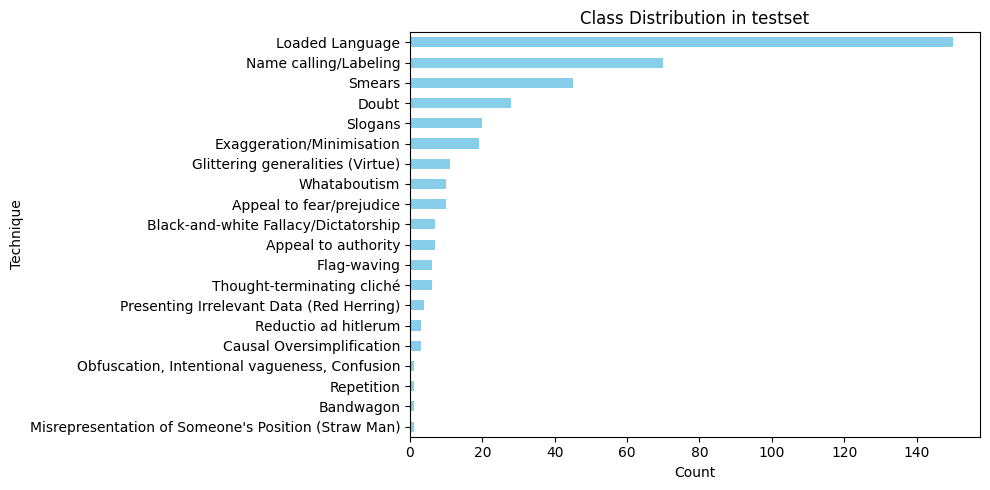

In [37]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 5))
class_distribution_test.plot(kind='barh', color='skyblue', ax=ax)
ax.set_xlabel('Count')
ax.set_ylabel('Technique')
ax.set_title('Class Distribution in testset')
ax.invert_yaxis()
plt.tight_layout()

plt.show()

### Text Frequency

#### Trainset

In [63]:
 x = df_preprocessed_train['x'][0]
len(x)

x

"['THERE', 'ARE', 'ONLY', 'TWO', 'GENDERS', 'FEMALE', 'MALE']"

In [64]:
df_preprocessed_train

,x,y
0,"['THERE', 'ARE', 'ONLY', 'TWO', 'GENDERS', 'FE...","[1, 2, 2, 2, 2, 2, 2]"
1,"['This', 'is', 'not', 'an', 'accident!']","[0, 0, 0, 0, 0]"
2,"['SO', 'BERNIE', 'BROS', ""HAVEN'T"", 'COMMITTED...","[0, 1, 2, 0, 0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, ..."
3,"['PATHETIC', 'The', 'Cowardly', 'Asshole', 'We...","[1, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 0, 1, 0, 0, ..."
4,"['WHO', 'TRUMP', 'REPRESENTS', 'WHO', 'DEMOCRA...","[0, 0, 0, 0, 0, 0]"
...,...,...
746,"['Has', 'anyone', 'heard', 'these', 'two', 'co...","[0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, ..."
747,"[""Let's"", 'get', 'Fu*king', 'Real', 'at', 'thi...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, ..."
748,"['A', 'whoremonger,', 'a', 'pervert,', 'and', ...","[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
749,"['Deceitful', 'Obnoxious', 'Narcissist', 'Arro...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]"


In [47]:
df_preprocessed_train = pd.read_csv('train_data.csv')

In [48]:
### Need to explore the frequency of the text
### Reasoning: For batch size
temp_dic = {'text_frequency':[]}
for text in df_preprocessed_train['x']:
    #print(len(text['text']))
    temp_dic['text_frequency'].append(len(text))

frequency_text = pd.DataFrame(temp_dic)

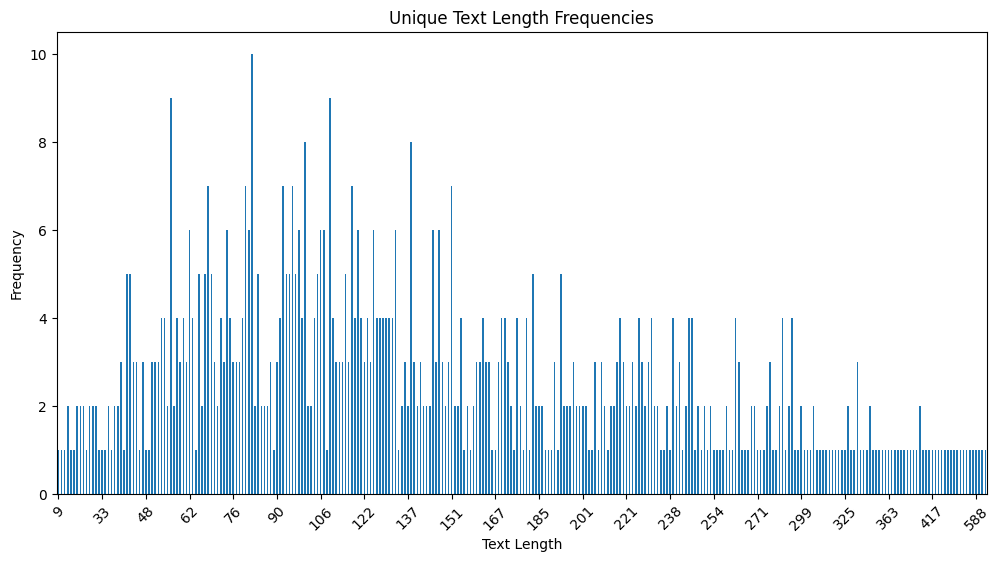

In [49]:
# Getting unique frequencies and their counts
unique_frequencies = frequency_text['text_frequency'].value_counts().sort_index()

# Plotting the unique frequencies
plt.figure(figsize=(12, 6))
unique_frequencies.plot(kind='bar')

plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Unique Text Length Frequencies')

# Reducing the number of ticks
plt.xticks(ticks=range(0, len(unique_frequencies), max(1, len(unique_frequencies)//20)), rotation=45)

plt.show()

In [50]:
frequency_text['text_frequency'].unique()

array([ 60,  40, 265, 303,  63, 192, 634,  75, 183, 136, 283,  90, 221,
       261,  82, 185, 177, 215, 253,  89,  68, 143,  57,  37,  49, 588,
       249, 234,  53,  81, 151, 100, 219, 149, 379, 237, 220, 409, 109,
       218, 275, 259, 179, 184, 131, 125, 228, 349,  72,  50, 171, 145,
       126, 239,  83, 170,  52, 133, 101,  99, 111,  51, 243, 106,  96,
       129,  22, 139, 547,  79, 305, 388,  41, 127,  93, 289, 336,  42,
       246, 119,  76, 447,  87, 137, 276,  58, 120,  59, 147,  80,  62,
       163, 225, 164, 361,  27, 353,  74, 113, 268, 392, 102, 242, 105,
       338, 201, 205,  23, 135, 385, 152, 138, 312, 162, 178, 128, 602,
         9, 148, 140, 115, 250, 245, 212, 417, 150,  97, 325,  73,  85,
        67, 107, 146, 216, 161, 110, 494, 172, 210,  78, 231,  71, 104,
        56,  65,  39, 308, 556, 375,  45, 222,  31, 103,  30,  69, 197,
        66, 114, 123, 122,  84,  91,  95,  29, 118, 130,  32, 121, 272,
       186, 232,  36, 202,  86,  54, 292, 169, 160,  94, 262, 36

#### valset

In [51]:
df_preprocessed_val = pd.read_csv('val_data.csv')

### Need to explore the frequency of the text
### Reasoning: For batch size
temp_dic = {'text_frequency':[]}
for text in df_preprocessed_val['x']:
    #print(len(text['text']))
    temp_dic['text_frequency'].append(len(text))

frequency_text = pd.DataFrame(temp_dic)

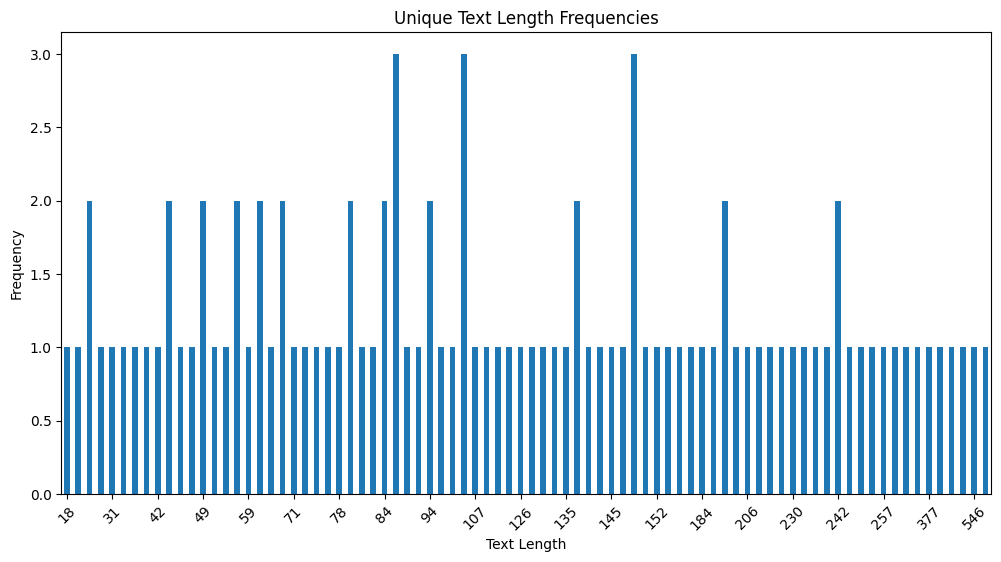

In [52]:
# Getting unique frequencies and their counts
unique_frequencies = frequency_text['text_frequency'].value_counts().sort_index()

# Plotting the unique frequencies
plt.figure(figsize=(12, 6))
unique_frequencies.plot(kind='bar')

plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Unique Text Length Frequencies')

# Reducing the number of ticks
plt.xticks(ticks=range(0, len(unique_frequencies), max(1, len(unique_frequencies)//20)), rotation=45)

plt.show()

In [53]:
frequency_text['text_frequency'].unique()

array([ 38, 242,  72,  78, 230, 233,  69, 448,  18, 195,  84,  71,  82,
        85,  93, 257, 140, 185, 147,  43,  80,  42, 130,  25, 114, 133,
       106, 135, 139, 546, 107,  26, 102,  94,  63, 145,  46, 149, 434,
        49,  53, 252, 207, 216,  59,  48, 134,  31,  88,  77, 204,  54,
        52, 182, 137, 104, 206, 121, 231, 154, 339, 562, 152, 253, 387,
       235,  32,  68, 246, 126, 214, 146,  35, 122,  83,  75, 184, 178,
       267, 296,  20, 377])

#### testset

In [54]:
df_preprocessed_test = pd.read_csv('test_data.csv')

### Need to explore the frequency of the text
### Reasoning: For batch size
temp_dic = {'text_frequency':[]}
for text in df_preprocessed_test['x']:
    #print(len(text['text']))
    temp_dic['text_frequency'].append(len(text))

frequency_text = pd.DataFrame(temp_dic)

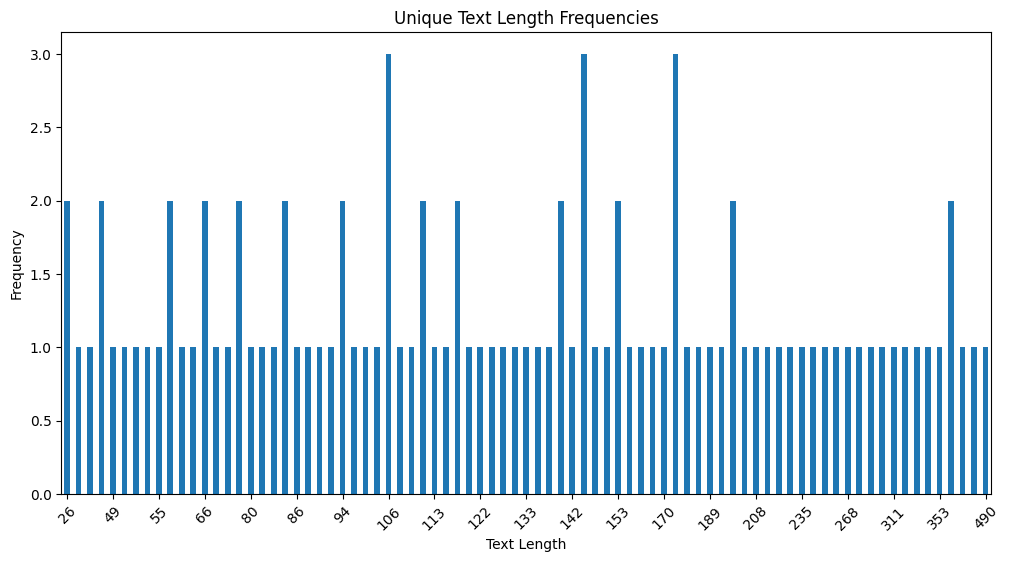

In [55]:
# Getting unique frequencies and their counts
unique_frequencies = frequency_text['text_frequency'].value_counts().sort_index()

# Plotting the unique frequencies
plt.figure(figsize=(12, 6))
unique_frequencies.plot(kind='bar')

plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Unique Text Length Frequencies')

# Reducing the number of ticks
plt.xticks(ticks=range(0, len(unique_frequencies), max(1, len(unique_frequencies)//20)), rotation=45)

plt.show()

In [56]:
frequency_text['text_frequency'].unique()

array([106, 101,  66, 225, 121, 191, 135, 122,  51, 197, 173,  82, 282,
        26, 156, 146, 311, 208, 256, 323, 324, 490, 189, 393, 303, 110,
        75, 353, 438, 268, 288, 190,  67, 464, 259,  50, 117,  65, 136,
       113, 350, 210, 134, 235, 240,  48, 125, 128, 103, 153, 149,  94,
       142, 132,  80, 148, 108, 114,  55, 155, 212, 183,  83,  84,  92,
        70, 184,  39,  91, 154,  97,  93,  49,  52,  62, 107,  56,  38,
        86, 170, 133])

### The labels in text frequency distribution

#### Trainset

In [74]:
data = data_one
rows = []

for item in data:
    text_id = item['id']
    text = item['text']
    labels = item['labels']
    num_labels = len(labels)
    label_lengths = [label['end'] - label['start'] for label in labels]
    
    rows.append({
        'text_id': text_id,
        'text': text,
        'num_labels': num_labels,
        'total_label_length': sum(label_lengths),
        'avg_label_length': sum(label_lengths) / num_labels if num_labels > 0 else 0
    })

df = pd.DataFrame(rows)

# Calculate the frequency distribution of the number of labels per text
label_frequency = df['num_labels'].value_counts().reset_index()
label_frequency.columns = ['num_labels', 'frequency']
label_frequency = label_frequency.sort_values(by='num_labels').reset_index(drop=True)

In [75]:
label_frequency

,num_labels,frequency
0,0,143
1,1,159
2,2,161
3,3,80
4,4,59
5,5,41
6,6,22
7,7,9
8,8,4
9,9,3


##### New trainset after the removal of overlapping spans

In [80]:
new_data_one = []

for i in range(0,len(data_one) - 1):  
    if(data_one[i]['labels']):
        temp_spans, _, _ = find_independent_spans(data_one[i]['labels'],df_train)
        new_data_one.append({'id':data_one[i]['id'],'text':data_one[i]['text'],'labels':temp_spans})
    else:
        new_data_one.append({'id':data_one[i]['id'],'text':data_one[i]['text'],'labels':data_one[i]['labels']})

In [84]:
data = new_data_one
rows = []

for item in data:
    text_id = item['id']
    text = item['text']
    labels = item['labels']
    num_labels = len(labels)
    label_lengths = [label['end'] - label['start'] for label in labels]
    
    rows.append({
        'text_id': text_id,
        'text': text,
        'num_labels': num_labels,
        'total_label_length': sum(label_lengths),
        'avg_label_length': sum(label_lengths) / num_labels if num_labels > 0 else 0
    })

df = pd.DataFrame(rows)

# Calculate the frequency distribution of the number of labels per text
label_frequency = df['num_labels'].value_counts().reset_index()
label_frequency.columns = ['num_labels', 'frequency']
label_frequency = label_frequency.sort_values(by='num_labels').reset_index(drop=True)

In [85]:
label_frequency

,num_labels,frequency
0,0,143
1,1,312
2,2,144
3,3,48
4,4,23
5,5,10
6,6,3
7,7,3
8,11,1


### Devset

In [76]:
data = data_two
rows = []

for item in data:
    text_id = item['id']
    text = item['text']
    labels = item['labels']
    num_labels = len(labels)
    label_lengths = [label['end'] - label['start'] for label in labels]
    
    rows.append({
        'text_id': text_id,
        'text': text,
        'num_labels': num_labels,
        'total_label_length': sum(label_lengths),
        'avg_label_length': sum(label_lengths) / num_labels if num_labels > 0 else 0
    })

df = pd.DataFrame(rows)

# Calculate the frequency distribution of the number of labels per text
label_frequency = df['num_labels'].value_counts().reset_index()
label_frequency.columns = ['num_labels', 'frequency']
label_frequency = label_frequency.sort_values(by='num_labels').reset_index(drop=True)

In [77]:
label_frequency

,num_labels,frequency
0,0,15
1,1,9
2,2,5
3,3,13
4,4,10
5,5,5
6,6,1
7,7,2
8,8,1
9,11,1


#### Testset

In [12]:
data = data_three
rows = []

for item in data:
    text_id = item['id']
    text = item['text']
    labels = item['labels']
    num_labels = len(labels)
    label_lengths = [label['end'] - label['start'] for label in labels]
    
    rows.append({
        'text_id': text_id,
        'text': text,
        'num_labels': num_labels,
        'total_label_length': sum(label_lengths),
        'avg_label_length': sum(label_lengths) / num_labels if num_labels > 0 else 0
    })

df = pd.DataFrame(rows)

# Calculate the frequency distribution of the number of labels per text
label_frequency = df['num_labels'].value_counts().reset_index()
label_frequency.columns = ['num_labels', 'frequency']
label_frequency = label_frequency.sort_values(by='num_labels').reset_index(drop=True)

In [13]:
label_frequency

,num_labels,frequency
0,0,41
1,1,45
2,2,54
3,3,27
4,4,15
5,5,7
6,6,6
7,7,3
8,8,1
9,9,1


# Approach Token Classification

Suppose we are following a two-model approach, one model for span identification and another for technique classification; we need to make sure there are no overlapping or enclosing spans, as this would cause conflict with spans when it comes to labelling. Therefore, it's essential to have stats on how many enclosing + overlapping spans there are to see if this method is feasible. 

#### Trainset: Overlapping + Enclosing Spans Information

In [16]:
## Function which identifies independent spans

def find_independent_spans(labels,df_train):
    # Sort spans by their end position
    labels.sort(key=lambda x: x['end'])

    total_overlapping_spans = 0
    independent_spans = []
    last_end = -1
    techniques = df_train['technique'].unique()
    techniques_dict = {technique: 0 for technique in techniques}
    
    for label in labels:
        if label['start'] > last_end:
            independent_spans.append(label)
            last_end = label['end']
        else:
            techniques_dict[label['technique']] += 1
            total_overlapping_spans += 1
            
    
    return independent_spans, techniques_dict, total_overlapping_spans

In [95]:
techniques = df_train['technique'].unique()
techniques_dict = {technique: 0 for technique in techniques}
total_overlapping_spans = 0

for i in range(len(data_one)):  
    if(data_one[i]['labels']):
        #not empty
        _, temp_techniques_dict, temp_total_overlapping_spans = find_independent_spans(data_one[i]['labels'],df_train)
        total_overlapping_spans += temp_total_overlapping_spans
        for technique in techniques_dict:
            techniques_dict[technique] += temp_techniques_dict[technique]

In [93]:
techniques_dict

{'Black-and-white Fallacy/Dictatorship': 11,
 'Slogans': 12,
 'Name calling/Labeling': 112,
 'Loaded Language': 95,
 'Smears': 136,
 'Causal Oversimplification': 15,
 'Exaggeration/Minimisation': 28,
 'Appeal to fear/prejudice': 29,
 'Reductio ad hitlerum': 5,
 'Repetition': 3,
 'Glittering generalities (Virtue)': 14,
 "Misrepresentation of Someone's Position (Straw Man)": 16,
 'Doubt': 15,
 'Obfuscation, Intentional vagueness, Confusion': 3,
 'Whataboutism': 31,
 'Flag-waving': 21,
 'Thought-terminating cliché': 6,
 'Presenting Irrelevant Data (Red Herring)': 0,
 'Appeal to authority': 9,
 'Bandwagon': 0}

In [63]:
print("Total number of Overlapping + Enclosing spans in the trainset:", total_overlapping_spans, "out of:", len(df_train)," in the trainset")

Total number of Overlapping + Enclosing spans in the trainset: 559 out of: 1498  in the trainset


In [41]:
print("Total Overlapping + Enclosing spans in the trainset:", total_overlapping_spans / len(df_train) * 100, "%")

Total Overlapping + Enclosing spans in the trainset: 37.31642189586115 %


In [56]:
techniques = df_train['technique'].unique()
perc_technique_dic = {technique: 0 for technique in techniques}

for technique in techniques_dict:
    perc_technique_dic[technique] = (techniques_dict[technique]/class_distribution_trainset[technique]) * 100

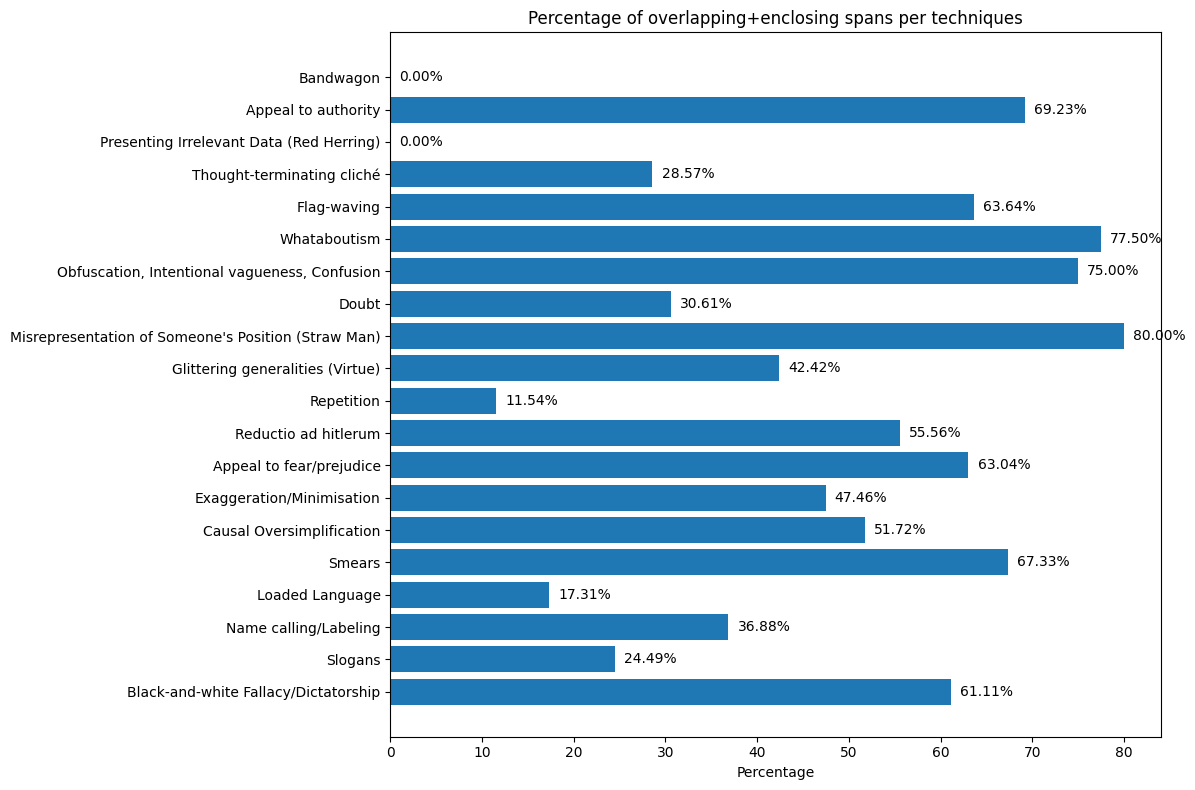

In [61]:
### Plot the number overlapping + Enclosing spans in per class as a %

techniques = list(perc_technique_dic.keys())
percentages = list(perc_technique_dic.values())

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))  
bars = ax.barh(techniques, percentages)  
ax.set_xlabel('Percentage')  
ax.set_title('Percentage of overlapping+enclosing spans per techniques') 

for bar, percentage in zip(bars, percentages):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2,
            f'{percentage:.2f}%', ha='left', va='center')

fig.tight_layout()  
#fig.savefig('bar_plot.png')
plt.show()

#### Devset: Overlapping + Enclosing Spans Information

In [67]:
techniques = df_dev['technique'].unique()
techniques_dict = {technique: 0 for technique in techniques}
total_overlapping_spans = 0

for i in range(len(data_two) - 1):  
    if(data_two[i]['labels']):
        #not empty
        _, temp_techniques_dict, temp_total_overlapping_spans = find_independent_spans(data_two[i]['labels'],df_dev)
        total_overlapping_spans += temp_total_overlapping_spans
        for technique in techniques_dict:
            techniques_dict[technique] += temp_techniques_dict[technique]

In [68]:
techniques_dict

{'Loaded Language': 14,
 'Name calling/Labeling': 23,
 'Exaggeration/Minimisation': 1,
 "Misrepresentation of Someone's Position (Straw Man)": 3,
 'Doubt': 6,
 'Smears': 16,
 'Causal Oversimplification': 1,
 'Appeal to fear/prejudice': 2,
 'Repetition': 0,
 'Slogans': 1,
 'Flag-waving': 2,
 'Thought-terminating cliché': 0,
 'Whataboutism': 4,
 'Bandwagon': 1,
 'Appeal to authority': 1,
 'Glittering generalities (Virtue)': 1,
 'Reductio ad hitlerum': 0}

In [69]:
print("Total number of Overlapping + Enclosing spans in the devset:", total_overlapping_spans, "out of:", len(df_dev)," in the devset")

Total number of Overlapping + Enclosing spans in the devset: 76 out of: 182  in the devset


In [70]:
print("Total Overlapping + Enclosing spans in the devset:", total_overlapping_spans / len(df_dev) * 100, "%")

Total Overlapping + Enclosing spans in the devset: 41.75824175824176 %


In [71]:
techniques = df_train['technique'].unique()
perc_technique_dic = {technique: 0 for technique in techniques}

for technique in techniques_dict:
    perc_technique_dic[technique] = (techniques_dict[technique]/class_distribution_dev[technique]) * 100

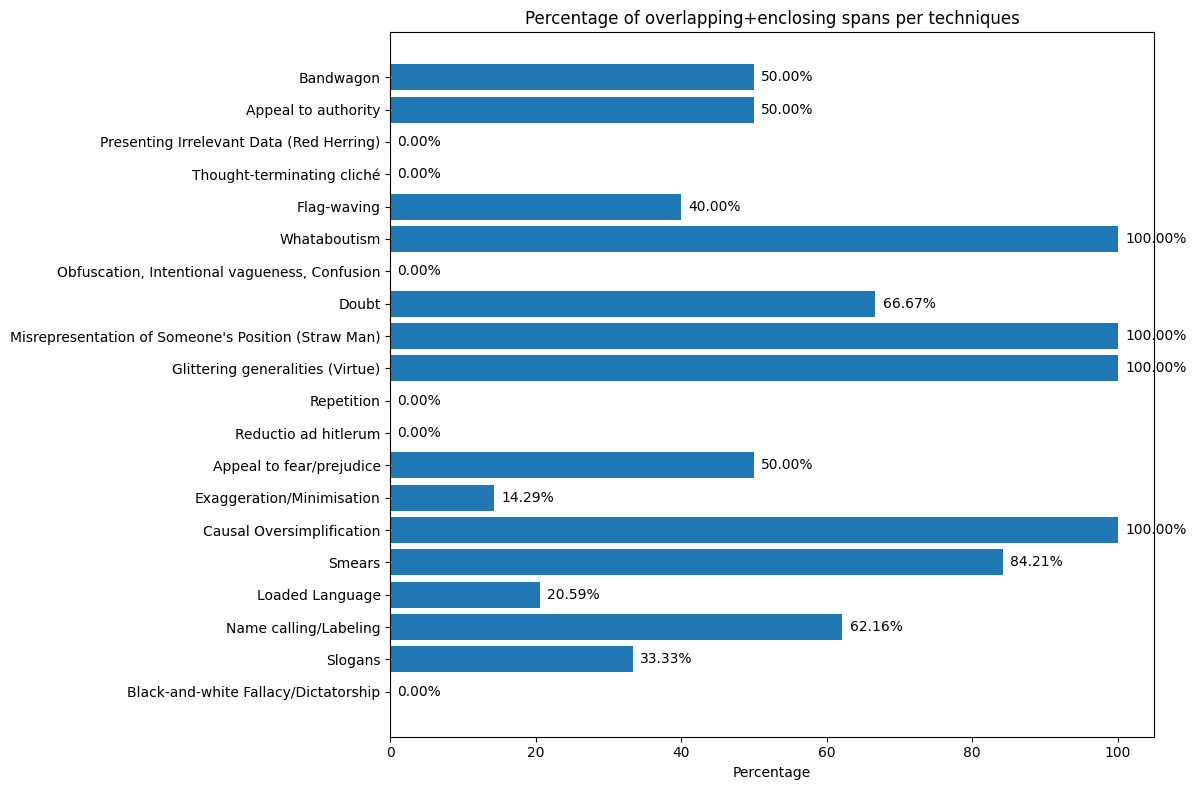

In [72]:
### Plot the number overlapping + Enclosing spans in per class as a %

techniques = list(perc_technique_dic.keys())
percentages = list(perc_technique_dic.values())

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))  
bars = ax.barh(techniques, percentages)  
ax.set_xlabel('Percentage')  
ax.set_title('Percentage of overlapping+enclosing spans per techniques') 

for bar, percentage in zip(bars, percentages):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2,
            f'{percentage:.2f}%', ha='left', va='center')

fig.tight_layout()  
#fig.savefig('bar_plot.png')
plt.show()

### Testset

In [17]:
techniques = df_test['technique'].unique()
techniques_dict = {technique: 0 for technique in techniques}
total_overlapping_spans = 0

for i in range(len(data_three)):  
    if(data_one[i]['labels']):
        #not empty
        _, temp_techniques_dict, temp_total_overlapping_spans = find_independent_spans(data_three[i]['labels'],df_test)
        total_overlapping_spans += temp_total_overlapping_spans
        for technique in techniques_dict:
            techniques_dict[technique] += temp_techniques_dict[technique]

In [18]:
techniques_dict

{'Name calling/Labeling': 24,
 'Slogans': 3,
 'Appeal to fear/prejudice': 4,
 'Loaded Language': 15,
 'Exaggeration/Minimisation': 11,
 'Doubt': 12,
 'Whataboutism': 6,
 'Smears': 27,
 'Reductio ad hitlerum': 3,
 'Obfuscation, Intentional vagueness, Confusion': 1,
 'Glittering generalities (Virtue)': 6,
 'Black-and-white Fallacy/Dictatorship': 3,
 'Flag-waving': 2,
 'Presenting Irrelevant Data (Red Herring)': 1,
 'Appeal to authority': 4,
 'Thought-terminating cliché': 0,
 'Repetition': 0,
 'Causal Oversimplification': 2,
 'Bandwagon': 1,
 "Misrepresentation of Someone's Position (Straw Man)": 0}

In [24]:
print("Total number of Overlapping + Enclosing spans in the testset:", total_overlapping_spans, "out of:", len(df_test)," in the devset")

Total number of Overlapping + Enclosing spans in the testset: 125 out of: 403  in the devset


In [25]:
print("Total Overlapping + Enclosing spans in the testset:", total_overlapping_spans / len(df_test) * 100, "%")

Total Overlapping + Enclosing spans in the testset: 31.017369727047146 %


In [29]:
techniques = df_test['technique'].unique()
perc_technique_dic = {technique: 0 for technique in techniques}

for technique in techniques_dict:
    perc_technique_dic[technique] = (techniques_dict[technique]/class_distribution_test[technique]) * 100

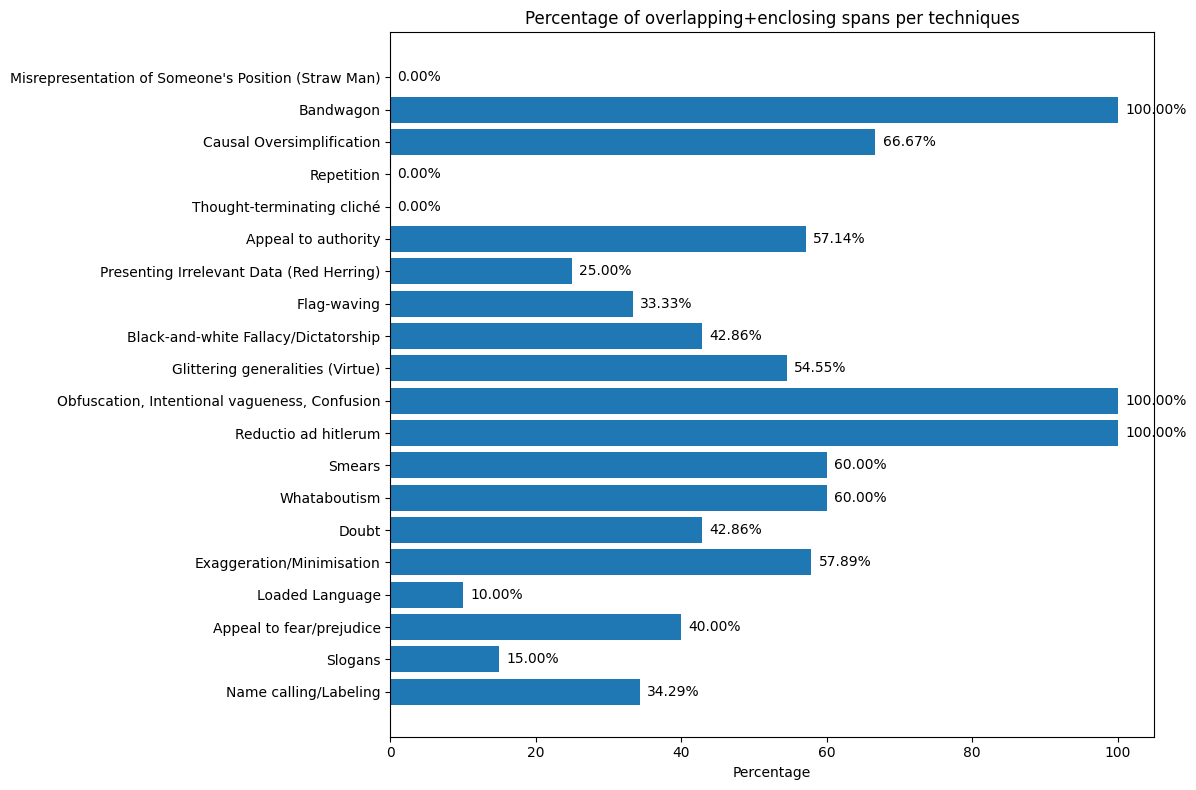

In [30]:
### Plot the number overlapping + Enclosing spans in per class as a %

techniques = list(perc_technique_dic.keys())
percentages = list(perc_technique_dic.values())

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))  
bars = ax.barh(techniques, percentages)  
ax.set_xlabel('Percentage')  
ax.set_title('Percentage of overlapping+enclosing spans per techniques') 

for bar, percentage in zip(bars, percentages):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2,
            f'{percentage:.2f}%', ha='left', va='center')

fig.tight_layout()  
#fig.savefig('bar_plot.png')
plt.show()